## Plot critical energy for cross section modification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mceq_config as config
from MCEq.core import MCEqRun
import crflux.models as pm
from MCEq.data import InteractionCrossSections
from cs_modifier import ModIntCrossSections
#from utils.helpers import *

In [ ]:
interactionmodel = "SIBYLL2.3c"
plot_dir = '/home/khymon/cs-analysis/'

In [28]:
interactionmodel = ["SIBYLL2.3c", "EPOSLHC", "DPMJET-III-19.1", "QGSJet-II-04"]
scale_factor = np.array([[0.5,0.5],[1.,1.], [0.5,1.],[1.5,1.5], [2.,1.]])

In [23]:
def plot_e_crit(interactionmodel,scale_factor):

    plot_dir = '/data/user/khymon/cs-analysis/'    

    mceq_tune = MCEqRun(
        interaction_model=interactionmodel,
        theta_deg=0.0,
        primary_model=(pm.HillasGaisser2012, "H3a"),
        density_model = (('MSIS00_IC',('SouthPole','January')))
    )

    mceq= MCEqRun(
        interaction_model=interactionmodel,
        theta_deg=0.0,
        primary_model=(pm.HillasGaisser2012, "H3a"),
        density_model = (('MSIS00_IC',('SouthPole','January')))
    )

    # modify cross section
    modcs = ModIntCrossSections(mceq._mceq_db, interaction_model=interactionmodel, scale_factor=scale_factor,threshold=1.e4,increase='const') #scale_factor=[1.,1.3],threshold=1.e4,increase='const')
    modcs.load(interaction_model=interactionmodel)

    mceq_tune._int_cs = modcs # add modification to cross section in mceq instance
    mceq_tune.set_interaction_model(interactionmodel, force=True)

    fig, ax = plt.subplots(figsize=(4,3))
    h = 15*1e5 #8km

    for pdgid, color, label in [(211,'blue',r'\pi^\pm'),
                                (321,'orange',r'{\rm K}^\pm'),
                            
                            ]:
        p = mceq_tune.pman[pdgid]
        ax.loglog(mceq_tune.e_grid, 
            (1/p.inverse_decay_length(cut=False)*
            mceq_tune.density_model.get_density(h)),
            color = color, lw=1.5, label=r'${0}$'.format(label))
    ax.loglog(mceq_tune.e_grid, (1/mceq_tune.pman[321].inverse_interaction_length()),color='orange',
            ls='--',lw=1.5)#,label=r'$\lambda_{\rm int, N}$')
    ax.loglog(mceq_tune.e_grid, (1//mceq_tune.pman[211].inverse_interaction_length()),color='blue',
            ls='--',lw=1.5)
    ax.set_ylim(1e-4,1e10)
    ax.set_xlim(10,1e10)

    ax.text(mceq_tune.e_grid[40], 5, 
            r'$\lambda_{\rm int}({\rm K}^\pm)$',
            color='orange')
    ax.text(mceq_tune.e_grid[80], 5, 
            r'$\lambda_{\rm int}({\rm \pi}^\pm)$',
            color='blue')

    #print critical energy
    ax.text(mceq_tune.e_grid[40], 0.1, 
           (211, '{0:4.3e}'.format(mceq_tune.pman[211].E_crit)),color='black')
    ax.text(mceq_tune.e_grid[40], 1.e-3, 
           (321, '{0:4.3e}'.format(mceq_tune.pman[321].E_crit)),color='black')

    ax.set_title(interactionmodel + ':  ' + str(scale_factor[0]) + 'x pi-air, ' + str(scale_factor[1]) + 'x K-air')
    ax.legend(loc='upper left',ncol=2, frameon=False)
    ax.set_ylabel(r'Int. / decay length $\lambda_{\rm dec}$ (cm$^2$/g)')
    ax.set_xlabel('Laboratory energy (GeV)')
    ax.minorticks_on()
    ax.tick_params(axis='x', which='both', direction='in', bottom=True, top=True)
    ax.tick_params(axis='y', which='both', direction='in', left=True, right=True)

    plt.tight_layout()
    plt.savefig(plot_dir +'ecrit_' + interactionmodel + '_' + str(scale_factor[0]) + 'xpi_' + str(scale_factor[1]) + 'xk.png',bbox_inches='tight' )

MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): SIBYLL23C
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
Applying mod with scaling factor: [0.5 0.5], threshold e0: 11220.18454301964
Applying mod with scaling factor: [0.5 0.5], threshold e0: 11220.18454301964
MCEqRun::set_interaction_model(): SIBYLL23C
Applying mod with scaling factor: [0.5 0.5], threshold e0: 11220.18454301964

/home/khymon/software/venv3/lib/python3.6/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/home/khymon/software/venv3/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in floor_divide


MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
MCEqRun::set_interaction_model(): EPOSLHC
ParticleManager::_init_default_tracking(): Initializing default tracking categories (pi, K, mu)
MCEqRun::set_density_model(): Setting density profile to MSIS00_IC ('SouthPole', 'January')
MSIS00IceCubeCentered::set_theta(): latitude = -90.00 for zenith angle =  0.00
MCEqRun::set_primary_model(): HillasGaisser2012 H3a
Applying mod with scaling factor: [0.5 0.5], threshold e0: 11220.18454301964
Applying mod with scaling factor: [0.5 0.5], threshold e0: 11220.18454301964
MCEqRun::set_interaction_model(): EPOSLHC
Applying mod with scaling factor: [0.5 0.5], threshold e0: 11220.18454301964
MCEqR

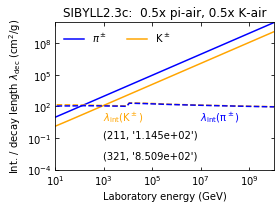

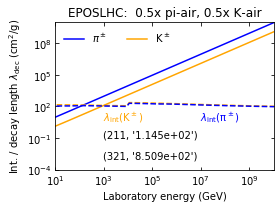

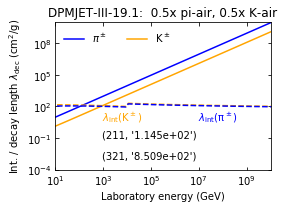

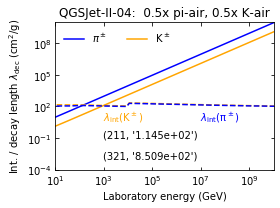

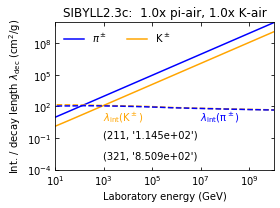

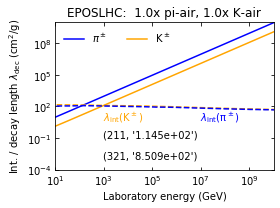

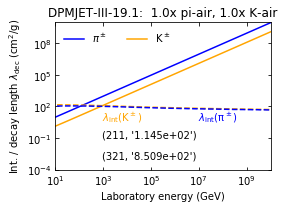

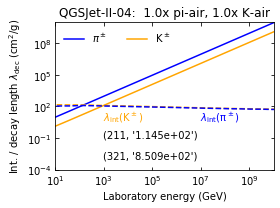

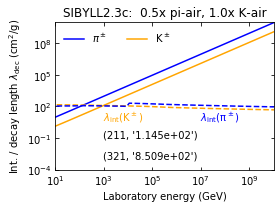

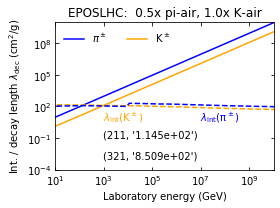

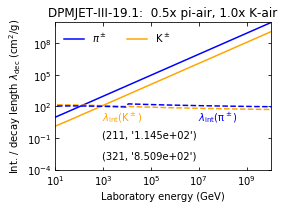

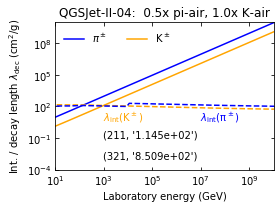

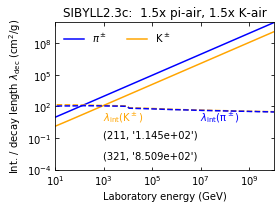

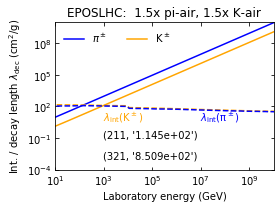

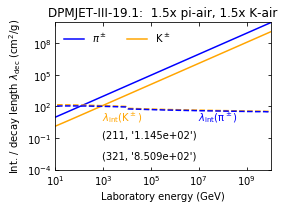

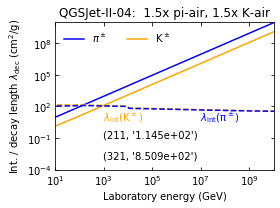

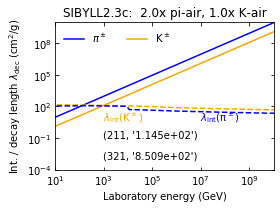

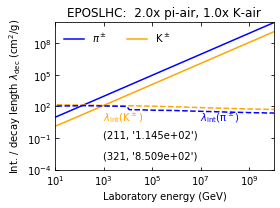

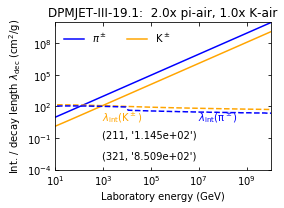

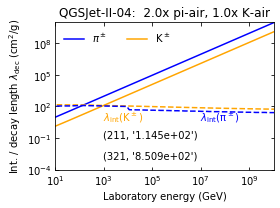

In [30]:
for s in range(5):
    for i in range(len(interactionmodel)):
        plot_e_crit(interactionmodel[i],scale_factor[s])